In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

#importing data 
df = pd.read_csv('new_train.csv')

#checking the values of cells
df.head

<bound method NDFrame.head of        age           job   marital            education  default housing loan  \
0       49   blue-collar   married             basic.9y  unknown      no   no   
1       37  entrepreneur   married    university.degree       no      no   no   
2       78       retired   married             basic.4y       no      no   no   
3       36        admin.   married    university.degree       no     yes   no   
4       59       retired  divorced    university.degree       no      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
32945   28      services    single          high.school       no     yes   no   
32946   52    technician   married  professional.course       no     yes   no   
32947   54        admin.   married             basic.9y       no      no  yes   
32948   29        admin.   married    university.degree       no      no   no   
32949   35        admin.   married    university.degree       no      no  yes  

In [98]:
X = df.drop('y', axis=1)
y = df['y']


print(X.head(), y.head())

   age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome  
0  nonexistent  
1      failure  
2  nonexistent  
3  nonexistent  
4  nonexistent   0     no
1     no
2 

In [99]:
#Encoding the values in data set from categorical to numerical and checking the values.
encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col])



print(X.head(), y)
print(X.shape, y.shape)

   age  job  marital  education  default  housing  loan  contact  month  \
0   49    1        1          2        1        0     0        0      7   
1   37    2        1          6        0        0     0        1      7   
2   78    5        1          0        0        0     0        0      3   
3   36    0        1          6        0        2     0        1      6   
4   59    5        0          6        0        0     0        0      4   

   day_of_week  duration  campaign  pdays  previous  poutcome  
0            4       227         4    999         0         1  
1            4       202         2    999         1         0  
2            1      1148         1    999         0         1  
3            1       120         2    999         0         1  
4            3       368         2    999         0         1   0         no
1         no
2        yes
3         no
4         no
        ... 
32945     no
32946     no
32947     no
32948     no
32949     no
Name: y, Length: 32950

In [100]:
#Splitting the data set in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#checking if the sets match
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26360, 15), (6590, 15), (26360,), (6590,))

In [101]:
#Creating and training random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None, min_samples_split=20, min_samples_leaf=3)

#Training the model on the data set.
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=20,
                       random_state=42)

In [102]:
#predicting the target variables on the test set
y_prediction = rf_classifier.predict(X_test)


0.9016691957511381
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      5798
         yes       0.66      0.37      0.47       792

    accuracy                           0.90      6590
   macro avg       0.79      0.67      0.71      6590
weighted avg       0.89      0.90      0.89      6590



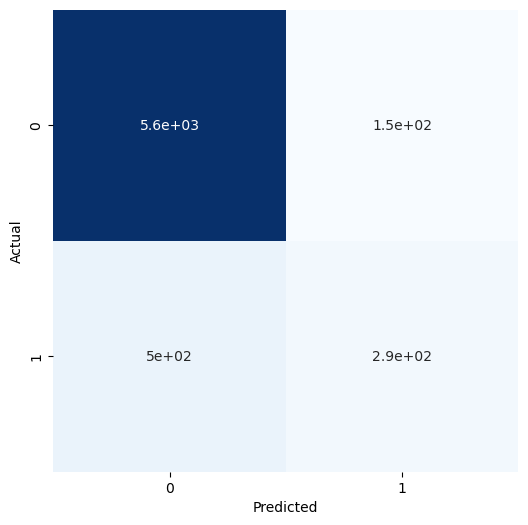

In [103]:
#Models evaluation
#Accuaracy
#Comparing the prediction set with a test set
accuaracy = accuracy_score(y_test, y_prediction)
print(accuaracy)

#Classification report
classification_rep = classification_report(y_test, y_prediction)
print(classification_rep)


#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#Summary:
#The accuracy score is 90.16%
#In this example we face the same problem, the model performs really good with predicting 'no', therefore there are some problems with predicting 'yes'.
#To prove the point where the model might be failing, the below for loop can indicate it. Since the training set has way more no values than yes values, it predicts value 'no' more accurately than yes values inorder to get more precise results with yes, our data set should have more yes values.
#In the end of the day, the model works really well in this case at least. Knowing the background of the data set (banking marketing capmpaign, of people who bought specific product), the model predicts customer who would rather say no to a propduct.
#in this case, the model states to whom better not to advertise, than to whom advertise.
#The results of random forest classifier is highly similar to the knn classifier, however, the diverence is not significant.
#In the end of the day, Random Forest classifier predicts better. The Advice would be to use Random Forest classifier.


In [104]:
#Tuning the model to find the best possible options with a current data set
#I am disabling this part since I have found the best parameters for the model
#params = {
 #   'n_estimators': [20, 30, 50, 100, 150, 200],
  #  'max_depth': [None, 3, 5, 10, 20, 50],
   # 'min_samples_split': [2, 5, 10, 20],
    #'min_samples_leaf': [1, 2, 3, 4, 5],
#}

#grid_search = GridSearchCV(estimator = rf_classifier, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
#grid_search.fit(X_train, y_train)

#best = grid_search.best_params_
#best_classi = grid_search.best_estimator_

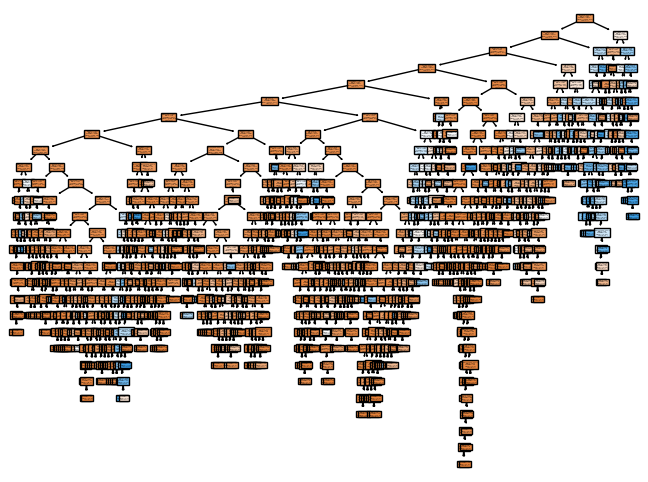

In [108]:
#Vusualizing Random Forest decision tree

from sklearn.tree import plot_tree

tree = rf_classifier.estimators_[4]
plt.figure(figsize=(8,6))
plot_tree(tree, filled=True, feature_names=X.columns.tolist(), class_names=['no', 'yes'])
plt.show()



In [ ]:
counting_no = 0
counting_yes = 0
for i in range(len(y_prediction)):
    if y_prediction[i] == 'no':
        counting_no += 1
    elif y_prediction[i] == 'yes':
        counting_yes += 1
    else:
        print('The prediction is unknown.')

print(counting_no, counting_yes)

6148 442
